# Individual Homework

- The section below reminds you in details how to go through an end-to-end machine learning project

- The second section recaps the first section

- Your HW assignment is in the last section

# Going through an end-to-end Machine Learning project


Pretend you’re a recently hired data scientist in a real estate company. Steps you’ll go through:
- Look at the big picture and frame the problem
- Get the data
- Discover and visualize the data to gain insights 
- Prepare the data for Machine Learning algorithms
- Select a model and train it
- Fine-tune your solution
- Present your solution
- Launch, monitor, and maintain your system

## Working with Real Data

When you are learning about Machine Learning it is best to actually experiment with real-world data, not just artificial datasets. Fortunately, there are thousands of open datasets to choose from, ranging across all sorts of domains. Here are a few places you can look to get data:

### Open datasets
Popular open data repositories: 
- UC Irvine Machine Learning Repository 
- Kaggle datasets
- Amazon’s AWS datasets 
- Meta portals (they list open data repositories):

 - http://dataportals.org/ 

 - http://opendatamonitor.eu/ 

 - http://quandl.com/ 

### Other pages listing many popular open data repositories: 
- Wikipedia’s list of Machine Learning datasets 
- quora.com question
- Datasets subreddit 





## Look at the big picture and frame the problem
- Define the objective in business terms.
- How will your solution be used?
- What are the current solutions/workarounds (if any)?
- How should you frame this problem (supervised/unsupervised, online offline, etc.)? 
- How should performance be measured?
- Is the performance measure aligned with the business objective?
- What would be the minimum performance needed to reach the business objective?
- What are comparable problems?Can you reuse experience or tools?
- Is human expertise available? 
- How would you solve the problem manually
- List the assumptions you (or others) have made so far.
- Verify assumptions if possible. 



### Select a Performance Measure
After framing the problem, you should select a performance measure.
The main two performance measures used for regression problems: RMSE (root mean squared error) and MAE (mean absolute error).

RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

## Get the data
### Download the Data
### Explore the data structure
Before starting to work with the data, an important step is to get a general understanding of the kind of data you are manipulating. 

Among the pandas functions that you can use to explore the structure of your data:
- `data.info()` : prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.
- `data.describe()` : computes some statistics on your data (min, max, std, quartiles, etc..)
- `data.value_counts()` : Counts the unique values of a series (one dimension data)



- Histogram 

`%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=, figsize=(,))
plt.show() `




### Create a Test DataSet
Scikit-Learn provides a few functions to split datasets into multiple subsets in various ways.

#### Random Sampling
The simplest function is `train_test_split`. It allows to pick some instances randomly from the dataset. A convention is to have a ratio of 80\% for training and 20\%.

`from sklearn.model_selection import train_test_split`

`train_set, test_set = train_test_split(data, test_size= , random_state= )`

- test_size : the size of the test set (a ratio between 0 and 1). 0.5 means that the test set would be 50 \% of the original set
- random_state : allows to set the random generator seed so that you get the same dataset in each run 

You can pass it multiple datasets with an identical number of rows, and it will split them on the same indices (this is very useful, for example, if you have a separate DataFrame for labels).



#### Stratified Sampling

Random sampling is generally fine if the dataset is large enough (especially relative to the number of attributes), but if it is not, we might run the risk of introducing a significant **sampling bias**. 


When a survey company decides to call 1,000 people to ask them a few questions, they don’t just pick 1,000 people randomly in a phone booth. They try to ensure that these 1,000 people are representative of the whole population. 

For example, the US population is composed of 51.3\% female and 48.7\% male, so a well-conducted survey in the US would try to maintain this ratio in the sample: 513 female and 487 male. 
This is called stratified sampling: 
- **the population is divided into homogeneous subgroups called strata, and the right number of instances is sampled from each stratum to guarantee that the test set is representative of the overall population**. 

If they used purely random sampling, there would be about 12\% chance of sampling a skewed test set with either less than 49\% female or more than 54\% female. Either way, the survey results would be significantly biased.



![StratifiedRandomSampling](img/StratifiedRandomSampling.jpg)



Scikit  learn provides a class for performing stratified sampling:
- import

`from sklearn.model_selection import StratifiedShuffleSplit`

- Create splits in the dataset (n_splits = Number of re-shuffling & splitting iterations, related to cross validation. The default is 10. In this HW use n_splits =1) 

`split = StratifiedShuffleSplit(n_splits=, test_size=, random_state=)`

- For every group, choose random samples:

`for train_index, test_index in split.split(data, data["category"]):
    strat_train_set = data.loc[train_index] 
    strat_test_set = data.loc[test_index]`







## Data Exploration
Discover and visualize the data to gain insights.
### Visualization
Data visualization is an important step of any Machine Learning project. It allows you to explore the data and to get a feel of what you have in the dataset.
It helps you identify a few data quirks that you may want to clean up before feeding the data to a Machine Learning algorithm.


The tutorial on Data Visualization on BrightSpace is a good starting point for you to learn data visualization.



### Looking for Correlations
Looking for correlations is an important step for any Machine Learning project. This step is important because it allows us to find out which attributes are the most correlated with the target attribute (what we want to classify or predict).

A standard correlation coefficient is the Pearson’s coefficient. The following function computes the pearson coefficient between every pair of attributes in a dataset:

`data.corr()`

Another way to check for correlation between attributes is to use Pandas’ scatter_matrix function. This function  plots every numerical attribute against every other numerical attribute. 

`from pandas.tools.plotting import scatter_matrix
scatter_matrix(data[column1, column2, ...], figsize=(,))`





The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that there is a strong positive correlation; When the coefficient is close to –1, it means that there is a strong negative correlation;  Finally, coefficients close to zero mean that there is no linear correlation.

![StandardCorrelationsCoefficientOfVariousDatasets](img/StandardCorrelationsCoefficientOfVariousDatasets.png)


The correlation coefficient only measures linear correlations (“if x goes up, then y generally goes up/down”). It may completely miss out on nonlinear relationships (e.g., “if x is close to zero then y generally goes up”). Note how all the plots of the bottom row have a correlation coefficient equal to zero despite the fact that their axes are clearly not independent: these are examples of nonlinear relationships. Also, the second row shows examples where the correlation coefficient is equal to 1 or –1; notice that this has nothing to do with the slope. For example, your height in inches has a correlation coefficient of 1 with your height in feet or in nanometers.





### Experimenting with Attribute Combinations
Sometimes, some attributes are not significant to the prediction unless they were combined with others. Attribute combinations might be as simple as dividing one attribute by another or applying arithmetic functions.

Combining attributes might increase the correlations with the target variable.

## Data preparation for ML algorithms
Data preparation for ML algorithms include data cleaning, handling text and categorical attributes and features scaling or normalization.

### Data Cleaning
Data cleaning includes handling missing values. 
To deal with missing values, you can either:

- Get rid of the whole attribute 
`data.drop("column_name", axis=1)`

- Get rid of the missing values
`data.dropna(['column_name1', 'column_name2', etc.]`

- Set the missing values to some value (zero, the mean, the median, etc.).
`data["column_name"].fillna(function)`. function can be data.median for example



### Handling Text and Categorical Attributes

Most Machine Learning algorithms prefer to work with numerical attributes, so a common practice is to convert  text labels to numbers.

Scikit-Learn provides a transformer for this task called LabelEncoder:

`from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cat_encoded = encoder.fit_transform(data_cat)`

The issue with this respresentation is that it transforms categorical attributes to ordered numbers. This assumes that there is a distance between each category. For instance, if you are dealing with an attribute coding the voting trends of some individuals, with categorical values L (left), R (right), and A (abstainer), this will be converted to 0,1, and 2...




To fix this issue, it is always better to create a separate binary attribute for each category. This means that we transform the categories into binary attributes. For the voting trend attribute just mentioned, this would amount to creating three new binary features: one for L (with value 1 if the individual has a left voting trend, and value 0 if not), one for R, and one for A.

Scikit-Learn provides a OneHotEncoder encoder to convert integer categorical values into one-hot vectors (binary). 

`from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
data_cat_binary = encoder.fit_transform(data_cat_encoded.reshape(-1,1))`

We used `.reshape(-1,1)`because `.fit_transform` expects a 2D data.

We can apply both transformations (from text categories to integer categories, then from integer categories to one-hot vectors) in one shot using the LabelBinarizer class.

`from sklearn.preprocessing import LabelBinarizer`. The rest is the same.




### Feature Scaling

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, Machine Learning algorithms don’t perform well when the input numerical attributes have very different scales.


There are two common ways to get all attributes to have the same scale.


#### min-max scaling 
Min-max scaling (many people call this normalization) is quite simple: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called `MinMaxScaler` for this. 
It has a `feature_range` hyperparameter that lets you change the range if you don’t want 0–1 for some reason.







#### Standardization
Standardization is quite different: first it subtracts the mean value (so standardized values always have a zero mean), and then it divides by the variance so that the resulting distribution has unit variance. 

Unlike min-max scaling, standardization does not bound values to a specific range, which may be a problem for some algorithms (e.g., neural networks often expect an input value ranging from 0 to 1). 
However, standardization is much less affected by outliers. 

Scikit-Learn provides a transformer called `StandardScaler` for standardization.




## Model Selection and Training
Once you have applied the above steps. The next step is to try several models on the training set and select the models that gives you the best results. 

**The goal is to shortlist a few (two to five) promising models.**

You don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training, and part for model validation.



When you train a model, you don’t “hope” it generalizes well to new cases, you need to :
- evaluate it
- fine-tune it if necessary

Let’s see first how to evaluate a model and then how to fine-tune it!!


### Performance Measure
As mentioned above, you should select a performance measure.
The performance measure is the measure that will allow you to evaluate the performance of your model.

In the following you will learn two performance measures used for regression problems: RMSE and MAE. 
For a comparison between different regression performance measures, check out this
<a href="https://www.youtube.com/watch?v=K490SP-_H0U">video</a>.

RMSE and the MAE are ways to measure the distance between two vectors: the vector of predictions and the vector of target values.

#### Root Mean Square Error
A typical performance measure for regression problems is the Root Mean Square Error (RMSE). It is computed by computing the root of a sum of squares.
It corresponds to the Euclidian norm: it is the notion of distance you are familiar with. It is also called the l2 norm, noted ∥ · ∥2 (or just ∥ · ∥).

It measures the **standard deviation of the errors (residuals)** the system makes in its predictions. Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. 


![RMSE](img/RMSE.png)
- `m` : number of instances in the dataset we will measure RMSE on
- `x^(i)` : vector of all the features values (without the labels) of the ith instance in the dataset.
- `y^(i)` : label (desired output of x^(i)
- `X` is a matrix containing all the feature values (excluding labels) of all instances in the dataset. There is one row per instance and the ith row is equal to the transpose of x(i), noted (x(i))T.
- `h` is your system’s prediction function, also called a hypothesis. When your system is given an instance’s feature vector x(i), it outputs a predicted value ŷ(i) = h(x(i)) for that instance (ŷ is pronounced “y-hat”).
- `RMSE(X,h)` is the cost function measured on the set of examples using your hypothesis h.

RMSE is generally the preferred performance measure for regression tasks. However, in some contexts it is preferred to use another function. For example, if there are many outliers, you may consider using the Mean Absolute Error (also called the Average Absolute Deviation)


#### Mean Absolute Error
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. 
MEA is computed by computing the sum of absolutes (MAE). It corresponds to the l1 norm. It is sometimes called the Manhattan norm.  

![MAE](img/MAE.png)


### Pick up a training and testing strategy
The only way to know how well a model will generalize to new cases is to actually try it out on new cases. 

The possible strategies are the following.



#### Train-test strategy
In the last lecture, we split our data set into two sets: the training set and the test set. 

The simplest scenrio is:
- train your model using the training set
- test it using the test set. 

<img src="img/TrainingTesting.png" hight="30" width="30%">



**Generalization error (out-of-sample error): error rate on new cases**

By evaluating your model on the test set, you get an estimation of the generalization error. 
This value tells you how well your model will perform on instances it has never seen before. 
If the training error is low (i.e., your model makes few mistakes on the training set) but the generalization error is high, it means that your model is overfitting the training data. 


So evaluating a model seems simple enough: just use a test set !!

Suppose you are hesitating between two models (say a linear model and a polynomial model): how can you decide? 

One option is to train both and compare how well they generalize using the test set. 

Suppose that the linear model generalizes better, but you want to apply some regularization to avoid overfitting. 


**How do you choose the value of the regularization hyperparameter?** 

One option is to train 100 different models using 100 different values for this hyperparameter. Suppose you find the best hyperparameter value that produces a model with the lowest generalization error, say just 5% error. 
So you launch this model into production, but unfortunately it does not perform as well as expected and produces 15% errors. What just happened? 

The problem is that you measured the generalization error multiple times on the test set, and you adapted the model and hyperparameters to produce the best model for that set. This means that the model is unlikely to perform as well on new data. 



#### Validation Set/Hold-Out  Strategy**


A common solution to this problem is to have a **second holdout set** called the **validation set**. You train multiple models with various hyperparameters using the training set, you select the model and hyperparameters that perform best on the validation set, and when you’re happy with your model you run a single final test against the test set to get an estimate of the generalization error. 

<img src="img/HoldOutStrategy.jpg">



#### Cross Validation

To avoid “wasting” too much training data in validation sets, a common technique is to use cross-validation: the training set is split into complementary subsets, and each model is trained against a different combination of these subsets and validated against the remaining parts. Once the model type and hyperparameters have been selected, a final model is trained using these hyperparameters on the full training set, and the generalized error is measured on the test set. 


<img src="img/kfoldStrategy.jpg">.

## Fine-Tuning a Model

Let’s assume that you now have a shortlist of promising models. You now need to fine-tune them. 

This is a crucial step to improve accuracy of the predicted results. 
This means exploring how model parameters can enhance prediction accuracy of our machine learning model.

Let’s look at a few ways you can do that.

### Hyperparameter vs. parameter

Hyperparameters are parameters of the models that can be input as arguments to the models.

A model **hyperparameter is a characteristic of a model that is external to the model** and whose **value cannot be estimated from data**. 

The value of the hyperparameter has to be **set before the learning process begins**. For example, c in Support Vector Machines, k in k-Nearest Neighbors, the number of hidden layers in Neural Networks.

In contrast, a **parameter is an internal characteristic of the model and its value can be estimated from data**. Example, beta coefficients of linear/logistic regression or support vectors in Support Vector Machines.


### Grid Search
Grid-search is used to find the optimal hyperparameters of a model which results in the most ‘accurate’ predictions.

Grid search builds a model for every combination of hyperparameters specified and evaluates each model.
![GridSearch](img/GridSearch.gif)

### Ensemble Methods
Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model (just like Random Forests perform better than the individual Decision Trees they rely on), especially if the individual models make very different types of errors. 

### Analyze the Best Models and Their Errors
You will often gain good insights on the problem by inspecting the best models. You will see this in the exercise.

### Evaluate Your System on the Test Set
After tweaking your models for a while, you eventually have a system that performs sufficiently well. Now is the time to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set, run your pipleline to transform the data (call
transform(), not fit_transform()!), and evaluate the final model on the test set:



## Launch, Monitor and Maintain your System
**Prelaunch phase**: 
- present your solution 
 - what you have learned, 
 - what worked and what did not,
 - what assumptions were made,
 - what your system’s limitations are
- document everything
- create nice presentations with clear visualizations and easy-to-remember statements (e.g., “the median income is the number one predictor of housing prices”)



**Launch Phase**
- Get your solution ready for production, in particular by plugging the production input data sources into your system and writing tests.
- Write monitoring code to check your system’s live performance at regular intervals and trigger alerts when it drops. This is important to catch not only sudden breakage, but also performance degradation. This is quite common because models tend to “rot” as data evolves over time, unless the models are regularly trained on fresh data.

- Evaluating your system’s performance will require sampling the system’s predictions and evaluating them. This will generally require a human analysis. These analysts may be field experts, or workers on a crowdsourcing platform (such as Amazon Mechanical Turk or CrowdFlower). Either way, you need to plug the human evaluation pipeline into your system.

- Make sure you evaluate the system’s input data quality. Sometimes performance will degrade slightly because of a poor quality signal (e.g., a malfunctioning sensor sending random values, or another team’s output becoming stale), but it may take a while before your system’s performance degrades enough to trigger an alert. If you monitor your system’s inputs, you may catch this earlier. Monitoring the inputs is particularly important for online learning systems.

- Train your models on a regular basis using fresh data. You should automate this process as much as possible. If you don’t, you are very likely to refresh your model only every six months (at best), and your system’s performance may fluctuate severely over time. If your system is an online learning system, you should make sure you save snapshots of its state at regular intervals so you can easily roll back to a previously working state.

# Machine Learning project checklist
This checklist can guide you through your Machine Learning projects. There are eight main steps: 
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms. 
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.

Obviously, you should feel free to adapt this checklist to your needs.



# Homework assignment
*Welcome to Machine Learning Housing Corporation! Your task is to predict median house values in Californian districts, given a number of features from these districts.*

For your HW we chose the California Housing Prices dataset from the StatLib repository. This dataset was based on data from the 1990 California census. It is not exactly recent (you could still afford a nice house in the Bay Area at the time), but it has many qualities for learning, so we will pretend it is recent data. We also added a categorical attribute and removed a few features for teaching purposes.


The first task you are asked to perform is to build a model of housing prices in California using the California census data. This data has metrics such as the population, median income, median housing price, and so on for each block group in California. Block groups are the smallest geographical unit for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). We will just call them “districts” for short.
Your model should learn from this data and be able to predict the median housing price in any district, given all the other metrics.

![HousingData](img/HousingData.png)



## Setup

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Get the data
You can download the data from the following <a href="https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.tgz">website</a>.

Extract the file and put it in the directory of your current folder.

The manual way is easy but the more you become a computer scientist, the more you would like to do things  automatically, you can execute the following code, to fetch the data automatically.
Automating the process of fetching the data is also useful if you need to install the dataset on multiple machines.

In [131]:
import os
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

### Call the above function to fetch the housing data. 
When you call this function, it creates a datasets/housing directory in your workspace, downloads the housing.tgz file, and extracts the housing.csv from it in this directory.


In [132]:
fetch_housing_data()

### Load the data using Pandas. Put it in a variable called housing.

In [133]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [134]:
housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Get a quick description of the data

- check out the info of the data frame
- print out its head

In [135]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [136]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### What do you notice? 

- which attributes are numerical?
- which attributes are not numerical? and what are their types?

longitude, latitude, housing_median_age, total_rooms,total_bedrooms,population ,households ,median_income ,median_house_value are numberical.
ocean_proximity is not numerical, it is string.

### Find out what categories exist in 'ocean_proximity' column and how many districts belong to each category.

Hint: use the `value_counts()` method on your data frame.

In [137]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### Show a summary of the numerical attributes

In [138]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Plot a histogram for each numerical attribute

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt

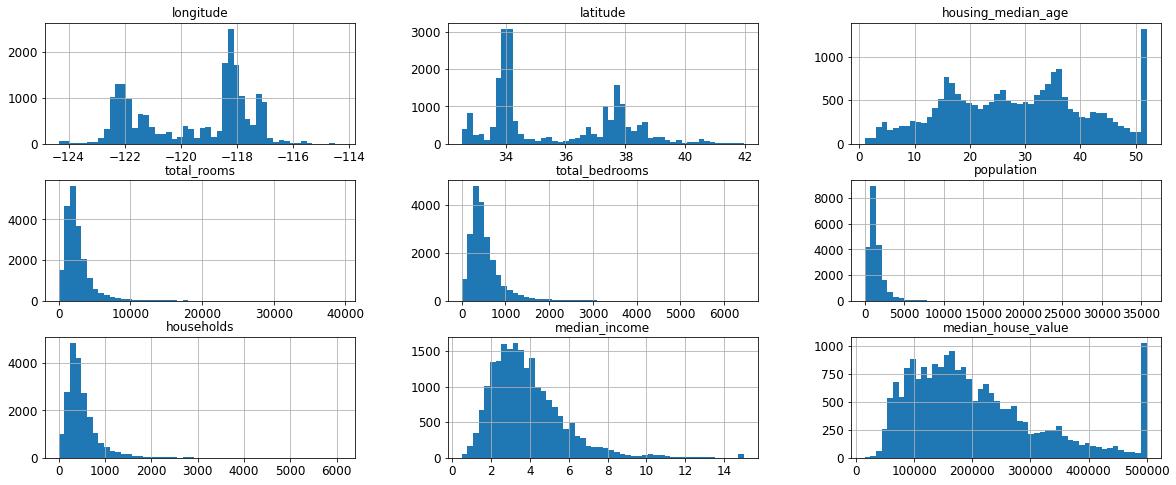

In [140]:
housing.hist(bins= 50, figsize=(20, 8))
plt.show()

### What do you notice?

- is the median income attribute expressed in local currency?
  Yes.
  
- have some attributes' values been caped? if so tell which one, and what consequences this may have.
  
- how do the attributes' scales compare?

- are the histogramms bell-shaped? or have fat tails?

- Yes the median income attribute is expressed in local currency.
- housing median value and median house value is caped. The price might goes beyond the limit of prediction model. The capped one should be removed.
- The attributes have different scales so its hard to compare them. 
- Many of the histograms are tail heavy shaped rather than bell-shaped.

## Create a Test Set
### Using random selection

Import `train_test_split` from `sklearn.model_selection` (set the `test_size` ratio to 0.2), to create a train_set and a test_set dataframe.

In [141]:
#from sklearn.model_selection import train_test_split
#x, y = housing[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']], housing['median_house_value']

In [142]:
#x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.2)

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

### Using Stratified Selection
Suppose you chatted with experts who told you that the median income is a very important attribute to predict median housing prices. You may want to ensure that the test set is representative of the various categories of incomes in the whole dataset. Since the median income is a continuous numerical attribute, you first need to create an income category attribute. Let’s look at the median income histogram more closely 

#### Plot the histogram of the "median_income" column

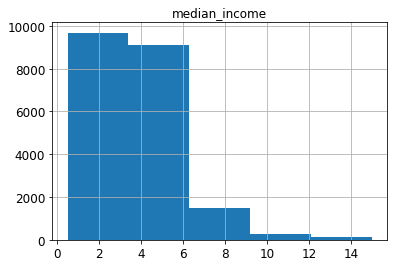

In [145]:
housing.hist(column = "median_income", bins = 5)
plt.show()

Most median income values are clustered around 2–5 (tens of thousands of dollars), but some median incomes go far beyond 6. It is important to have a sufficient number of instances in your dataset for each stratum, or else the estimate of the stratum’s importance may be biased. This means that you should not have too many strata, and each stratum should be large enough. The following code creates an income category attribute by dividing the median income by 1.5 (to limit the number of income categories), and rounding up using ceil (to have discrete categories), and then merging all the categories greater than 5
into category 5:

In [146]:
# Divide by 1.5 to limit the number of income categories
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
# Label those above 5 as 5
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

Show the `income_cat` counts, and plot its histogram now

In [147]:
housing["income_cat"].count()

20640

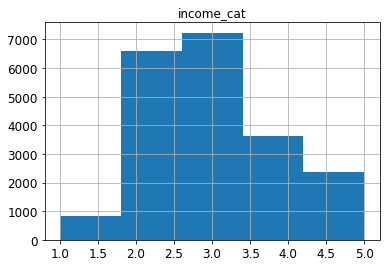

In [148]:
housing.hist(column = "income_cat", bins = 5)
plt.show()

Now you are ready to do stratified sampling based on the income category. 
#### Use Scikit-Learn’s StratifiedShuffleSplit to do stratified sampling

The following code does the job, with a ratio of 0.2.

In [149]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
strat_test_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN,5.0
10970,-117.86,33.77,39.0,4159.0,655.0,1669.0,651.0,4.6111,240300.0,<1H OCEAN,4.0
20351,-119.05,34.21,27.0,4357.0,926.0,2110.0,876.0,3.0119,218200.0,<1H OCEAN,3.0
6568,-118.15,34.20,52.0,1786.0,306.0,1018.0,322.0,4.1518,182100.0,INLAND,3.0
13285,-117.68,34.07,32.0,1775.0,314.0,1067.0,302.0,4.0375,121300.0,INLAND,3.0
...,...,...,...,...,...,...,...,...,...,...,...
20519,-121.53,38.58,33.0,4988.0,1169.0,2414.0,1075.0,1.9728,76400.0,INLAND,2.0
17430,-120.44,34.65,30.0,2265.0,512.0,1402.0,471.0,1.9750,134000.0,NEAR OCEAN,2.0
4019,-118.49,34.18,31.0,3073.0,674.0,1486.0,684.0,4.8984,311700.0,<1H OCEAN,4.0
12107,-117.32,33.99,27.0,5464.0,850.0,2400.0,836.0,4.7110,133500.0,INLAND,4.0


To see if this worked as expected, compare the income category proportions in the full housing dataset and the test dataset we just obtained:

In [150]:
housing["income_cat"].value_counts() / len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [151]:
strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

The following code compares the income category proportions in the overall dataset, in the test set generated with stratified sampling, and in a test set generated using purely random sampling. As you can see, the test set generated using stratified sampling has income category proportions almost identical to those in the full dataset, whereas the test set generated using purely random sampling is quite skewed.



In [152]:
def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified": income_cat_proportions(strat_test_set),
    "Random": income_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [153]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1.0,0.039826,0.039729,0.040213,0.973236,-0.243309
2.0,0.318847,0.318798,0.324370,1.732260,-0.015195
3.0,0.350581,0.350533,0.358527,2.266446,-0.013820
4.0,0.176308,0.176357,0.167393,-5.056334,0.027480
5.0,0.114438,0.114583,0.109496,-4.318374,0.127011


#### Drop the "income_cat" column from the stratified training and testing sets
Use `data.drop("column_name", axis=1, inplace=True)`. 

In [154]:
for c in (strat_train_set, strat_test_set):
    c.drop("income_cat", axis=1, inplace=True)

## Data Exploration


In [155]:
#data.plot(kind='scatter', x="column_name", y='column_name')

#plt.show()

Let’s create a copy so you can play with it without harming the training set:

In [156]:
housing = strat_train_set.copy()

### Visualize the geographical data : 
#### Use the geographical information (latitude and longitude) to create a scatterplot of all districts.
`data.plot(kind="scatter", x="column_name", y="column_name")`

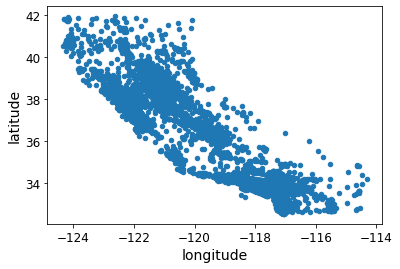

In [157]:
housing.plot(kind="scatter", x="longitude", y="latitude");

This looks like California all right, but other than that it is hard to see any particular pattern. Setting the
alpha option to 0.1 makes it much easier to visualize the places where there is a high density of data points.
Do it!

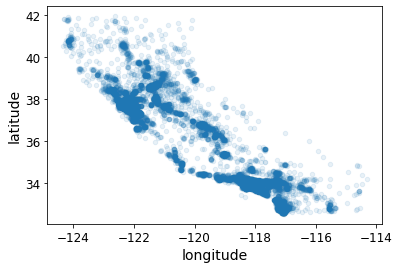

In [158]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1);

You can clearly see the high-density areas, namely the Bay Area and around Los Angeles and San Diego, plus a long line of fairly high density in the Central Valley, in particular around Sacramento and Fresno.

More generally, our brains are very good at spotting patterns on pictures, but you may need to play around with visualization parameters to make the patterns stand out.

#### Create a scatter plot of the geographical information in function of the district's population and the price of the house.
This can be done by manipulating some parameters of the scatter plot function.
`data.plot(kind='scatter', x, y, s=data_column, label="s_label", c=None, kwrds)`
- s : The size of each point. Possible values are:
  - A single scalar so all points have the same size.
  - A sequence of scalars, which will be used for each point’s size recursively. For instance, when passing     [2,14] all points size will be either 2 or 14, alternatively.
- c : The color of each point. Possible values are:
  - A single color string referred to by name, RGB or RGBA code, for instance ‘red’ or ‘#a98d19’.
  - A sequence of color strings referred to by name, RGB or RGBA code, which will be used for each point’s color recursively. For instance [‘green’,’yellow’] all points will be filled in green or yellow, alternatively.
  - A column name or position whose values will be used to color the marker points according to a colormap.
- kwrds: Keyword arguments to pass on to DataFrame.plot().

To answer this question:
- Set s to housing population divided by 100
- Set c to the price of the house "median_house_value"
- Use a predefined color map (option cmap) called jet, which ranges from blue (low values) to red (high prices): `cmap=plt.get_cmap("jet")`. check <a href="https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html">this</a> for more details. 

In the resulting plot, the radius of each circle represents the district’s population (option s), and the color represents the price (option c). 

The argument `sharex=False` fixes a display bug (the x-axis values and legend were not displayed). This is a temporary fix (see: https://github.com/pandas-dev/pandas/issues/10611).

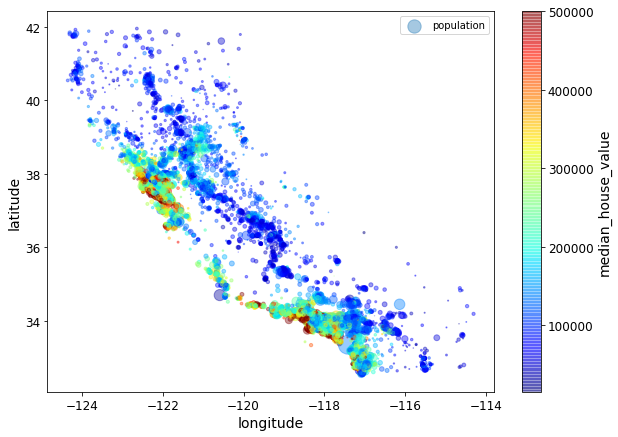

In [159]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=housing["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

#### What does the above plot show? Try to intrepret it.

### Looking for correlations
#### Find the Pearson correlation  of the housing data

Hint: apply the `corr()` method to your dataframe

In [160]:
corr_matrix = housing.corr()

In [161]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

#### Sort the values of the "median_house_value" in the correlation matrix in descending order
The `median_house_value` in the correlation matrix represents the correlation between all the features and the target feature (what we are trying to predict). So sorting its values will show us which features are the most correlated with it.

Use `.sort_values(ascending=False)`

Type Markdown and LaTeX:  𝛼2

#### What do you notice from these correlations?

The variable of are top 3 variables in terms of correlation with our target variable. 
Median income, total rooms, housing median age, households and total_bedrooms are positively correlated to the target variable. 


#### Use scatter_matrix from Pandas to plot the correlations between "median_house_value", "median_income", "total_rooms" and "housing_median_age"

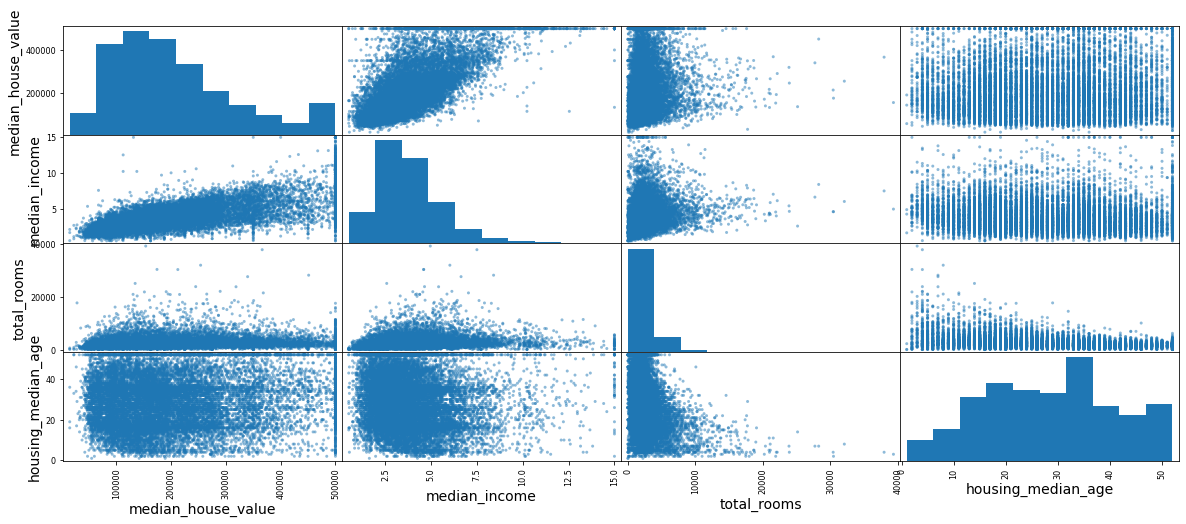

In [162]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(20, 8));


From the plot, which attribute seems to be the most promising to predict the house price?


The most promising attribute to predict the median house value is the median income, so let’s zoom in on their correlation scatterplot

Zoom in on it by plotting its scatter plot in function of the median house value.

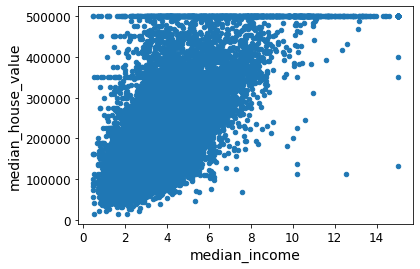

In [163]:
housing.plot(kind="scatter", x="median_income", y="median_house_value");

#### What does this plot reveal?

Some unusual lines around $350,000 and $450,000. Also, there is a strong solid line around $500,000 which is capped line. 

### Experimenting with Attributes Combinations 
The total number of rooms in a district is not very useful if you don’t know how many households there are. What you really want is the number of rooms per household. 

Similarly, the total number of bedrooms by itself is not very useful: you probably want to compare it to the number of rooms. And the population per household also seems like an interesting attribute combination to look at. 

Create 3 new attributes and put them in new columns: 
- rooms_per_household : Total rooms divided by the number of households
- bedrooms_per_room : Total bedrooms divided by the Total rooms
- population_per_household : Population divided by the number of housholds

In [164]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [165]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

#### What do you notice about the new correlations?

The variable of rooms per household is much more correlated than total rooms. It means the larger the house, the higher the price.


## Prepare the data for Machine Learning algorithms


### Data Cleaning

#### Drop the labels from the training set and create a new variable for the labels
We separate the predictors and the labels since we don’t necessarily want to apply the same transformations to the predictors and the target values.

In [167]:
housing = strat_train_set.drop("median_house_value", axis=1) # drop labels for training set
housing_labels = strat_train_set["median_house_value"].copy()

#### Lets check a sample of the missing values.


In [168]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


#### Delete all the rows having missing values in the total_bedrooms column.

Use the `dropna()` method.

In [169]:
sample_incomplete_rows.dropna(subset=['total_bedrooms'])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


#### Delete the "total_bedrooms" column

In [170]:
sample_incomplete_rows.drop(['total_bedrooms'], axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,3468.0,1405.0,3.1662,<1H OCEAN


#### Fill the missing values with median

From the sample of incomplet rows:

In [171]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()

use the `fillna(median, inplace=True)` method, where median will have been computed from `housing["total_bedrooms"]

In [172]:
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True) 

#### Preprocess the categorical input feature, `ocean_proximity`:

Extract its column and store it into a new dataframe, call it `housing_cat`

In [173]:
housing_cat = housing[["ocean_proximity"]]

Import `LabelEncoder` from `sklearn.preprocessing`

In [174]:
from sklearn.preprocessing import LabelEncoder


apply its `fit_transform()` method to `housing_cat`, and store the result into `housing_cat_encoded`

In [175]:
LabelEncoder = LabelEncoder()

In [176]:
housing_cat_encoded = LabelEncoder.fit_transform(housing_cat)

/Users/agnes/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Now one-hot-encode `housing_cat`:

In [177]:
from sklearn.preprocessing import OneHotEncoder
O_H_E = OneHotEncoder()


apply its `fit_transform()` method to `housing_cat`, and store the result into `housing_cat_1hot`

In [178]:
housing_cat_1hot = O_H_E.fit_transform(housing_cat) 

By default, the `OneHotEncoder` class returns a sparse array, but we can convert it to a dense array if needed by calling the `toarray()` method:

In [179]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Alternatively, you can set `sparse=False` when creating the `OneHotEncoder`:

In [180]:
cat_encoder = OneHotEncoder(sparse=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [181]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Custom Transformers 
Here is a transformer class that adds the combined attributes we discussed earlier.
This class computes and adds the bedroom per room as well as the population per houshold that you have computed last lecture.

In [182]:
from sklearn.base import BaseEstimator, TransformerMixin

# Specify the indices of the columns from the dataset that you will be using to do your calculation
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

# Define a class called CombinedAttributesAdder (you can name it whatever you want)
# The class takes two arguments BaseEstimator, TransformerMixin
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X, y=None):
        # compute the rooms per houshold and the population per household
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        # if the argument add_bedrooms_per_room is true then compute the number of bedrooms per rooms
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            # convert the result to a Numpy array
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        # if not convert the others to a numpy array
        else:
            return np.c_[X, rooms_per_household, population_per_household]

To use the transformer just defined you need to first create an instance of the class

In [183]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)

Then you apply the transform function on it

In [184]:
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., '<1H OCEAN', 4.625368731563422,
        2.094395280235988],
       [-121.93, 37.05, 14.0, ..., '<1H OCEAN', 6.008849557522124,
        2.7079646017699117],
       [-117.2, 32.77, 31.0, ..., 'NEAR OCEAN', 4.225108225108225,
        2.0259740259740258],
       ...,
       [-116.4, 34.09, 9.0, ..., 'INLAND', 6.34640522875817,
        2.742483660130719],
       [-118.01, 33.82, 31.0, ..., '<1H OCEAN', 5.50561797752809,
        3.808988764044944],
       [-122.45, 37.77, 52.0, ..., 'NEAR BAY', 4.843505477308295,
        1.9859154929577465]], dtype=object)

In this example the transformer has one hyperparameter, `add_bedrooms_per_room`, set to `True` by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not. 

More generally, you can add a hyperparameter to gate any data preparation step that you are not 100% sure about. 

The more you automate these data preparation steps, the more combinations you can automatically try out, making it much more likely that you will find a great combination (and saving you a lot of time).

You can now convert the result to a dataframe

In [185]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"])
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
0,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN,4.625369,2.094395
1,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN,6.00885,2.707965
2,-117.2,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN,4.225108,2.025974
3,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND,5.232295,4.135977
4,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN,4.50581,3.047847


As you can see, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations. Here is a small pipeline for the numerical attributes:

### Build a pipeline for numerical attributes

In [186]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

Define the dataframe of numerical attributes, by dropping `ocean_proximity` from the `housing` dataframe, call the result `housing_num`.
The appply the above pipeline to `housing_num`. Store the result in a dataframe called `housing_num_tr`.

In [189]:
housing_num = housing.drop(['ocean_proximity'], axis=1)

In [190]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

### You now have a pipeline for numerical values, and you also need to apply transformations on the categorical values: here is how can you join these transformations into a single pipeline:

In [191]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [192]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

In [193]:
housing_prepared.shape

(16512, 16)

## Select and train a model 

### Training and evaluating on the training set

#### Train a Linear Regression model

Import it from sklearn and fit it on `housing_prepared` vs `housing_labels`

In [195]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

You now have a working linear model

#### Try the full preprocessing pipeline on a few training instances

- Select 5 rows from from `housing` and `housing_labels` (corresponding to the same rows in `housing`!), call the resulting dataframe `some_data` and `some_labels`
- apply the full pipeline to `some_data`, calling the result `some_data_prepared`
- apply the linear model `predict()` method on `some_data_prepared`, and print out the actual labels of `some_labels` to compare

In [199]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [200]:
some_data_prepared = full_pipeline.transform(some_data)

In [201]:
lin_reg.predict(some_data_prepared)


array([210644.60459286, 317768.80697211, 210956.43331178,  59218.98886849,
       189747.55849879])

In [202]:
print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


#### Measure this regression model’s RMSE on the whole training set using Scikit-Learn’s mean_squared_error function

In [203]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

#### What do you think about  this error?

Since the lower the score is better, this one is not a good score. It may reveal to the model underfit the data. We may need more data to do the better prediction.

#### Train a Decision Tree Regressor 
This is a powerful model, capable of finding complex nonlinear relationships in the data. Use the class `DecisionTreeRegressor(random_state=42)`. Import it from from `sklearn.tree`. 

In [204]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

#### Evaluate the model on the training set using MSE

In [205]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

#### What do you think about  this error?

Is the model doing a great job or badly overfitting?

The score is perfect but it could be overfitting the model.

### Better Evaluation using Cross Validation

#### Evaluate the tree regression model using 10-fold cross validation 

In [206]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [207]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [70194.33680785 66855.16363941 72432.58244769 70758.73896782
 71115.88230639 75585.14172901 70262.86139133 70273.6325285
 75366.87952553 71231.65726027]
Mean: 71407.68766037929
Standard deviation: 2439.4345041191004


**What's your interpretation of the cross validation scores?**

The score shows that it does more worse than our previous linear regression model.
The standard deviation is 2,431 Dollar, it means the prediction error could be $2,431 more or less. 

#### Compute the same scores for the Linear Regression model just to be sure:

use the same code as above replacing `tree_reg`, and use the `display_score` function:

In [208]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.6740017983507


**What's your conclusion?**

That’s right: the Decision Tree model is overfitting so badly that it performs worse than the Linear Regression model.

#### Try one last model now: the RandomForestRegressor. Train, fit and compute the RMSE as above

As you know, Random Forests work by training many Decision Trees on random subsets of the features, then averaging out their predictions. 
Building a model on top of many other models is called Ensemble Learning, and it is often a great way to push ML algorithms even further. 

In [209]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(random_state=42)

In [212]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18603.515021376355

In [211]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [49519.80364233 47461.9115823  50029.02762854 52325.28068953
 49308.39426421 53446.37892622 48634.8036574  47585.73832311
 53490.10699751 50021.5852922 ]
Mean: 50182.303100336096
Standard deviation: 2097.0810550985693


**What's your conclusion?**

The score is fine. 

In [213]:
scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
pd.Series(np.sqrt(-scores)).describe()

count       10.000000
mean     69052.461363
std       2879.437224
min      64969.630564
25%      67136.363758
50%      68156.372635
75%      70982.369487
max      74739.570526
dtype: float64

## Fine-tune your model

### Use Grid Search to optimize the hyperparameters of the Random Forest Regressor. 
Use the following combinations.

This param_grid tells Scikit-Learn to first evaluate all 3 × 4 = 12 combinations of `n_estimators` and `max_features` hyperparameter values specified in the first dict (don’t worry about what these
hyperparameters mean for now; they will be explained later), then try all 2 × 3 = 6 combinations of hyperparameter values in the second dict, but this time with the bootstrap hyperparameter set to
False instead of True (which is the default value for this hyperparameter).

All in all, the grid search will explore 12 + 6 = 18 combinations of RandomForestRegressor
hyperparameter values, and it will train each model five times (since we are using five-fold cross validation). In other words, all in all, there will be 18 × 5 = 90 rounds of training! It may take quite a long time, but when it is done you can get the best combination of parameters like this:

(copy-paste the following code, fill in the missing parts, and run it)

In [214]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [], 'max_features': []},
    {'bootstrap': [], 'n_estimators': [], 'max_features': []},
  ]

In [ ]:
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

In [219]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]
forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display the best hyperparameter combination found, and best estimator:

In [220]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [221]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

Display the score of each hyperparameter combination tested during the grid search:

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

**Recap the hyperparameters of your best model**

The RMSE score for this combinationis 50,804. The model is fine tuned

## Analyze the best models and their Errors

For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate
predictions:

In [222]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.33442355e-02, 6.29090705e-02, 4.11437985e-02, 1.46726854e-02,
       1.41064835e-02, 1.48742809e-02, 1.42575993e-02, 3.66158981e-01,
       5.64191792e-02, 1.08792957e-01, 5.33510773e-02, 1.03114883e-02,
       1.64780994e-01, 6.02803867e-05, 1.96041560e-03, 2.85647464e-03])

Let’s display these importance scores next to their corresponding attribute names:

In [223]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hhold'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hhold'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

**What are your conclusions, and next steps you could try to refine the model even further?**

## Evaluate your best estimator on the test Set and conclude

In [225]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [226]:
final_rmse

47730.22690385927

The final prediciton error is 47730.